# Visualizing Hurricane Ian Using hvPlot

Within this post, we explore how we can use [`hvPlot`](https://hvplot.holoviz.org/) to plot data from Hurricane Ian, which will soon make landfall in Florida. 

## Motivation
By the end of this post, you will be able to recreate the following plot:
![Hurricane Ian Plot](../images/hurricane-ian-hvplot.png)


## Imports

In [42]:
import cartopy.crs as ccrs
import geopandas as gpd
import fiona

from siphon.simplewebservice.ndbc import NDBC
import hvplot.pandas
fiona.drvsupport.supported_drivers['libkml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw' # enable KML support which is disabled by default

## Access the Data

We are interested in looking at data related to Hurricane Ian, which is currently off the Florida Coast. We want to plot the expected hurricane track, and the some surface observations from buoys, or floating platforms on water!


### National Hurricane Center Data

We are using a few different datasets here. Let's start with the hurricane forecast from the National Hurricane Center, accessible from their Geographic Information Systems (GIS) webpage:
- [NHC GIS Portal](https://www.nhc.noaa.gov/gis/)

We need to select the kmz files ([a Google GIS file standard](https://www.google.com/earth/outreach/learn/packaging-content-in-a-kmz-file/#:~:text=latest%20version%20here.-,What%20Is%20a%20KMZ%20File%3F,KMZ%20files%20using%20Google%20Earth.) for the Hurricane Ian cone and track.

#### The Cone

A forecast cone is defines as the following, from the [National Hurricane Center](https://www.nhc.noaa.gov/aboutcone.shtml#:~:text=Definition%3A,%2C%2036%20hours%2C%20etc)

```
The cone represents the probable track of the center of a tropical cyclone, and is formed by enclosing the area swept out by a set of circles (not shown) along the forecast track (at 12, 24, 36 hours, etc). The size of each circle is set so that two-thirds of historical official forecast errors over a 5-year sample fall within the circle. The circle radii defining the cones in 2022 for the Atlantic, Eastern North Pacific, and Central North Pacific basins are given in the table below.

One can also examine historical tracks to determine how often the entire 5-day path of a cyclone remains completely within the area of the cone. This is a different perspective that ignores most timing errors. For example, a storm moving very slowly but in the expected direction would still be within the area of the cone, even though the track forecast error could be very large. Based on forecasts over the previous 5 years, the entire track of the tropical cyclone can be expected to remain within the cone roughly 60-70% of the time.
```

#### The Best Track
The Best Track Dataset is the best estimated track from the variety of possible scenarios.

#### Read the Data Using Geopandas

In [43]:
hurricane_cone = gpd.read_file("../data/AL092022_CONE_latest.kmz")
hurricane_track = gpd.read_file("../data/AL092022_TRACK_latest.kmz")

In [44]:
hurricane_track.head()

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,...,pubAdvTime,TCInitLocation,maxWindKnots,maxWindMPH,maxGustKnots,maxGustMPH,stormMovement,minimumPressure,snippet,geometry
0,None,\n\t \t <table> \n ...,NaT,NaT,NaT,None,-1,0,-1,None,...,800 PM EDT Tue Sep 27 2022,"24.4N, 83.0W",105,120,130,150,NNE,947,empty,"LINESTRING Z (-83.00000 24.40000 0.00000, -82...."
1,None,\n\t \t <table> \n ...,NaT,NaT,NaT,None,-1,0,-1,None,...,None,None,None,None,None,None,None,None,empty,"LINESTRING Z (-83.00000 24.40000 0.00000, -82...."
2,None,\n\t \t <table> \n ...,NaT,NaT,NaT,None,-1,0,-1,None,...,None,None,None,None,None,None,None,None,empty,POINT Z (-83.00000 24.40000 0.00000)
3,None,\n\t \t <table> \n ...,NaT,NaT,NaT,None,-1,0,-1,None,...,None,None,None,None,None,None,None,None,empty,POINT Z (-82.90000 25.30000 0.00000)
4,None,\n\t \t <table> \n ...,NaT,NaT,NaT,None,-1,0,-1,None,...,None,None,None,None,None,None,None,None,empty,POINT Z (-82.50000 26.60000 0.00000)


Our hurricane track file includes additional point data - we just need the line (the first row, so let's filter based on the `TCInitLocation`

In [45]:
hurricane_track = hurricane_track.dropna(subset=["TCInitLocation"])
hurricane_track

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,...,pubAdvTime,TCInitLocation,maxWindKnots,maxWindMPH,maxGustKnots,maxGustMPH,stormMovement,minimumPressure,snippet,geometry
0,None,\n\t \t <table> \n ...,NaT,NaT,NaT,None,-1,0,-1,None,...,800 PM EDT Tue Sep 27 2022,"24.4N, 83.0W",105,120,130,150,NNE,947,empty,"LINESTRING Z (-83.00000 24.40000 0.00000, -82...."


#### Investigate the GeoDataframes
Let's check out the geodataframe. Notice how it looks like a typical dataframe, with additional geometry information.

In [46]:
hurricane_cone

,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,...,stormType,advisoryDate,basin,fcstpd,storm,atcfid,advisoryNum,stormNum,stormName,geometry
0,None,None,NaT,NaT,NaT,None,-1,0,-1,None,...,HU,800 PM EDT Tue Sep 27 2022,AL,120,Hurricane Ian,AL092022,19A,9,Ian,"POLYGON Z ((-83.04900 24.14015 0.00000, -83.02..."


We can create static `matplotlib` plots using the `.plot()` method.

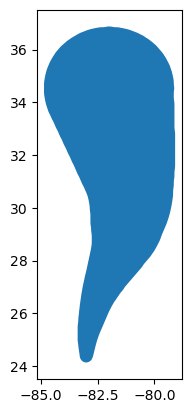

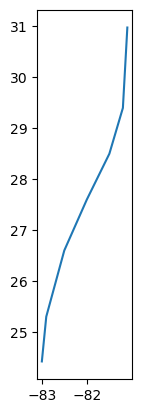

In [47]:
hurricane_cone.plot()
hurricane_track.plot();

### Access NOAA Buoy Data
The National Oceanic and Atmospheric Administation (NOAA) has a buoy dataset (from the [National Data Buoy Center](https://www.ndbc.noaa.gov/)), which includes observations from around the world. We can access this data using [`siphon`](https://unidata.github.io/siphon/latest/index.html), a tool developed by the Unidata Program Center which makes accessing this dataset **much** easier.

We can use the `.lastest_observations()` method from the `NDBC` module to access the latest data.

In [48]:
buoy_df = NDBC.latest_observations()
buoy_df

,station,latitude,longitude,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,3hr_pressure_tendency,air_temperature,water_temperature,dewpoint,visibility,water_level_above_mean,time
0,13001,12.000,-23.000,336.0,4.1,5.0,NaN,NaN,NaN,NaN,1013.3,NaN,27.6,NaN,NaN,NaN,NaN,2022-09-28 01:00:00+00:00
1,13002,21.000,-23.000,37.0,3.5,4.8,NaN,NaN,NaN,NaN,NaN,NaN,26.1,26.8,NaN,NaN,NaN,2022-09-28 01:00:00+00:00
2,13008,15.000,-38.000,14.0,5.7,7.0,NaN,NaN,NaN,NaN,1012.8,NaN,27.3,28.0,NaN,NaN,NaN,2022-09-28 01:00:00+00:00
3,13009,8.000,-38.000,173.0,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.8,NaN,NaN,NaN,NaN,2022-09-28 00:00:00+00:00
4,14043,-12.000,67.000,101.0,4.8,6.0,NaN,NaN,NaN,NaN,1012.7,NaN,24.2,25.0,NaN,NaN,NaN,2022-09-28 01:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,WYCM6,30.326,-89.326,10.0,5.7,7.2,NaN,NaN,NaN,NaN,1017.7,1.3,25.9,26.0,NaN,NaN,NaN,2022-09-28 01:00:00+00:00
895,YATA2,59.548,-139.733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1013.1,NaN,NaN,12.0,NaN,NaN,NaN,2022-09-28 00:54:00+00:00
896,YKRV2,37.251,-76.342,20.0,4.1,4.6,NaN,NaN,NaN,NaN,1016.3,NaN,21.4,NaN,NaN,NaN,NaN,2022-09-28 00:54:00+00:00
897,YKTV2,37.227,-76.479,10.0,3.6,4.6,NaN,NaN,NaN,NaN,1016.1,NaN,20.3,23.5,NaN,NaN,NaN,2022-09-28 00:54:00+00:00


#### Filter the Dataset

We are interested in locations that have `water_temperature` values, so we filter using `.dropna()`

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

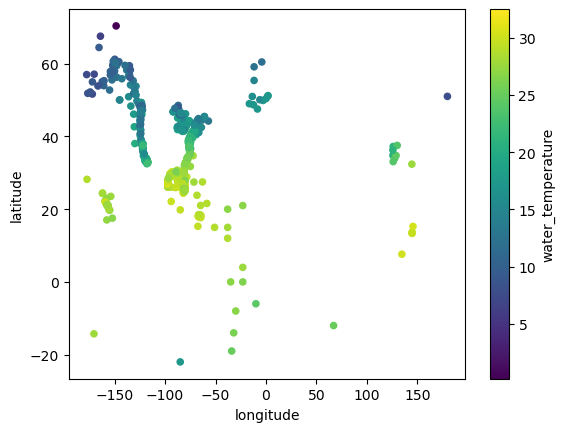

In [49]:
buoy_df = buoy_df.dropna(subset=["water_temperature"])
buoy_df.plot.scatter(x='longitude', y='latitude', c='water_temperature')

## Plot our Data using hvPlot
Let's move to interactive visualization! 

### Plot the Hurricane Cone and Track Using hvPlot
We can do better than just static plots - let's create an interactive one using hvPlot!

In [50]:
hurricane_cone.hvplot(color='None',
                      line_width=3,
                      coastline=True,
                      xlim=(-95, -65),
                      ylim=(20, 40),
                      label='NHC Forecast Cone for Hurricane Ian',
                      projection=ccrs.PlateCarree(),
                      features=["land", "ocean"])

:Overlay
   .Land.I                                       :Feature   [Longitude,Latitude]
   .Ocean.I                                      :Feature   [Longitude,Latitude]
   .Polygons.NHC_Forecast_Cone_for_Hurricane_Ian :Polygons   [Longitude,Latitude]
   .Coastline.I                                  :Feature   [Longitude,Latitude]

And the same for the best estimated track

In [51]:
hurricane_track_plot = hurricane_track.hvplot(line_color='Red',
                                              color="None",
                                              line_width=3,
                                              coastline=True,
                                              xlim=(-95, -65),
                                              ylim=(20, 40),
                                              label='NHC Forecast Track for Hurricane Ian',
                                              projection=ccrs.PlateCarree(),
                                              features=["land", "ocean"])
hurricane_track_plot

:Overlay
   .Land.I                                    :Feature   [Longitude,Latitude]
   .Ocean.I                                   :Feature   [Longitude,Latitude]
   .Path.NHC_Forecast_Track_for_Hurricane_Ian :Path   [Longitude,Latitude]
   .Coastline.I                               :Feature   [Longitude,Latitude]

We still need a title though, since this does not tell us what time this is valid... this information is in the dataframe!

In [52]:
hurricane_cone.advisoryDate

0    800 PM EDT Tue Sep 27 2022
Name: advisoryDate, dtype: object

#### Combine our Forecast Cone and Track Plots
Let's add the titles, and combine our plots.

In [53]:
hurricane_track_plot = hurricane_track.hvplot(line_color='Red',
                                              color="None",
                                              line_width=3,
                                              coastline=True,
                                              xlim=(-95, -65),
                                              ylim=(20, 40),
                                              title=f'NHC Forecast Valid: {hurricane_track.pubAdvTime.values[0]}',
                                              label='NHC Forecast Track for Hurricane Ian',
                                              projection=ccrs.PlateCarree()
                                             )

hurricane_cone_plot = hurricane_cone.hvplot(color='None',
                                            line_width=3,
                                            line_color='Black',
                                            coastline=True,
                                            xlim=(-95, -65),
                                            ylim=(20, 40),
                                            title=f"NHC Forecast Valid {hurricane_cone.advisoryDate.values[0]}",
                                            label='NHC Forecast Cone for Hurricane Ian',
                                            projection=ccrs.PlateCarree(),
                                            features=["land", "ocean"])

hurricane_plot = (hurricane_cone_plot * hurricane_track_plot)
hurricane_plot

:Overlay
   .Land.I                                       :Feature   [Longitude,Latitude]
   .Ocean.I                                      :Feature   [Longitude,Latitude]
   .Polygons.NHC_Forecast_Cone_for_Hurricane_Ian :Polygons   [Longitude,Latitude]
   .Coastline.I                                  :Feature   [Longitude,Latitude]
   .Path.NHC_Forecast_Track_for_Hurricane_Ian    :Path   [Longitude,Latitude]
   .Coastline.II                                 :Feature   [Longitude,Latitude]

### Plot the Buoy Data using hvPlot

In [54]:
buoy_plot = buoy_df.hvplot.points(x='longitude',
                                  y='latitude',
                                  c='water_temperature',
                                  cmap='inferno',
                                  label='NOAA Buoy Locations',
                                  title='NOAA Buoy Water Temperature',
                                  clabel='Temperature (degC)',
                                  geo=True,
                                  coastline=True,
                                  projection=ccrs.PlateCarree(),
                                  xlim=(-95, -65),
                                  ylim=(20, 40),
                                  clim=(20, 35))
buoy_plot

:Overlay
   .Points.NOAA_Buoy_Locations :Points   [longitude,latitude]   (water_temperature)
   .Coastline.I                :Feature   [Longitude,Latitude]

## Final Visualization
Let's put it all together! We combine our plots using the `*` operator.

In [55]:
hurricane_plot * buoy_plot

:Overlay
   .Land.I                                       :Feature   [Longitude,Latitude]
   .Ocean.I                                      :Feature   [Longitude,Latitude]
   .Polygons.NHC_Forecast_Cone_for_Hurricane_Ian :Polygons   [Longitude,Latitude]
   .Coastline.I                                  :Feature   [Longitude,Latitude]
   .Path.NHC_Forecast_Track_for_Hurricane_Ian    :Path   [Longitude,Latitude]
   .Coastline.II                                 :Feature   [Longitude,Latitude]
   .Points.NOAA_Buoy_Locations                   :Points   [longitude,latitude]   (water_temperature)
   .Coastline.III                                :Feature   [Longitude,Latitude]

## Conclusions
Within this example, we explored visualizing data from the [National Hurricane Center](https://www.nhc.noaa.gov/), and from the [National Data Buoy Center](https://www.ndbc.noaa.gov/). We encourage you to try this out on your own.

In the future, it would be nice to add other datasets, such as weather radar data, onto these plots as well.